# Overview

Classification is a classic machine learning application. Classification basically categorises your output in two classes i.e. your output can be one of two things. For example, a bank wants to know whether a customer will be able pay his/her monthly investments or not? We can use machine learning algorithms to determine the output of this problem, which will be either Yes or No(Two classes). But what if you want to classify something that has more than 2 categories and isn’t as simple as a yes/no problem?

This is where multi-class classification comes in. MultiClass classification can be defined as the classifying instances into one of three or more classes. In this article we are going to do multi-class classification using K Nearest Neighbours. KNN is a super simple algorithm, which assumes that similar things are in close proximity of each other. So if a datapoint is near to another datapoint, it assumes that they both belong to similar classes.

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

I will use famous iris dataset for this example

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns=['Id'])

In [4]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.isnull().values.any()


False

In [6]:
#mapping text targets to numbers
df['Species'] = df['Species'].map({'Iris-setosa' :0, 'Iris-versicolor' :1, 'Iris-virginica' :2}).astype(int) 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


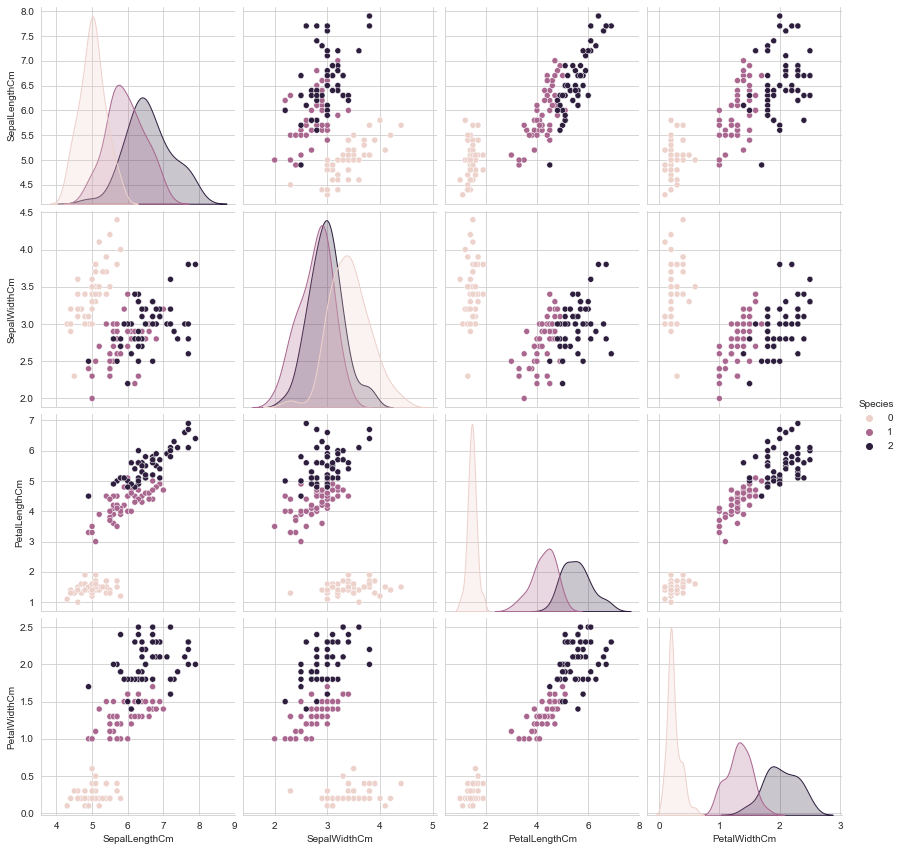

In [7]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", height=3);
plt.show()

/Users/mcanbaz/py_39_env/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


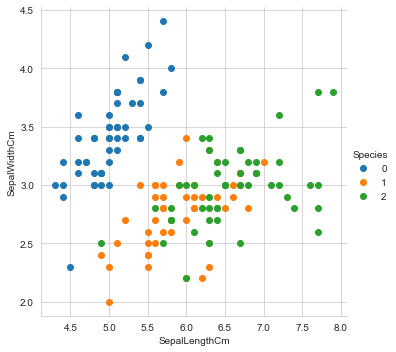

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='Species', size=5) \
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
.add_legend();
plt.show()

#### Inferences from EDA:

1- While Setosa can be easily identified, Virnica and Versicolor have some overlap.

2- Length and Width are the most important features to identify various flower types.

After the EDA and before training our model on the dataset, the one last thing left to do is normalisation. Normalisation is basically bringing all the values of different features on a same scale. As different features has different scale, normalising helps us and the model to optimise it’s parameters more efficiently. We normalise all our input from scale: 0 to 1. Here, X is our inputs(hence dropping the classified species) and Y is our output(3 classes).


In [11]:
x_data = df.drop(['Species'],axis=1)
y_data = df['Species']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Finally, we have reached to the point of training the dataset. We use the built-in KNN algorithm from sci-kit learn. We split the our input and output data into training and testing data, as to train the model on training data and testing model’s accuracy on the testing model. We choose a 80%–20% split for our training and testing data.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()


In [14]:
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(cm)
classification_report1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (classification_report)
accuracy_scor = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [ ]:
sns.heatmap(cm, annot=True)